# Actividad Evaluable: Obtención de estadisticas descriptivas
### Regina Echavarría Torres A00841096

## Carga de Datos

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [42]:
#1. Cargar los datos
df = pd.read_csv('diabetes.csv')

In [43]:
#2. 
df.shape

(768, 9)

Hay 768 datos y 9 variables diferentes. 

In [44]:
#3. Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Analisis de variables seleccionadas: "DiabetesPedigreeFunction" y "Age"

## Descripción

### DiabetesPedigreeFunction
cuantitativa y continua

### Age 
cuantitativa discreta

## Outcome
categórica binaria


In [45]:
#Analisis de variables
df[["DiabetesPedigreeFunction", "Age", "Outcome"]].describe()

,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000
mean,0.471876,33.240885,0.348958
std,0.331329,11.760232,0.476951
min,0.078000,21.000000,0.000000
25%,0.243750,24.000000,0.000000
50%,0.372500,29.000000,0.000000
75%,0.626250,41.000000,1.000000
max,2.420000,81.000000,1.000000


### que representan y sus rangos

DiabetesPedegreeFunction representa la probabilidad de tener diabetes basandose en la historia familiar su rango es de 0.078 a 1, no se porque dice que el valor máximo es de 2.42 si lo que describe es una probabilidad. 

Age representa la edad de las personas con diabetes, su rango es de 21 años a 81 años. 

Outcome es una variable dependiente de las demás variables, solo puede tener dos valores: "1" idíca que sí tiene diabetes, "0" indica que no tiene diabetes. 

### Conclusiones de los datos

A juzgar por la media, mediana y desviación estandar de los datos, pude llegar a las siguientes conclusiones.

De la variable DiabetesPedegreeFunction puedo concluir que hay en promedio un 37% de probabilidad que una persona tenga diabetes basandose en el historial familiar. Como la desviación estántar es de 33% se puede concluir que los datos estan muy dispersos, por lo que puede que para algunas personas sea muy poca la infuencia familiar y para otras sea un factor determinante. 

De la variable Age sabemos que en promedio las personas que fueron encuestadas tienen 33 años, con una desviación estandar de 11.76 años. Lo que indica que se encuestaron en su mayoria adultos de mediana edad. 

De la variable outcome la media es de 0.35, como es una variable que solo puede tomar valor 1 o 0, puedo concluir que son menos las personas que tienen diabetes. Si fueran la misma cantidad de valores 1 y 0, la media seria 0.5. Como es menor a 0.5, se puede decir que hay más personas que no tienen diabetes. 

## Consulta

### 1. Cuantos jovenes diabeticos hay

In [46]:
jovendiabetes = (df['Outcome'] == 1) & (df['Age'] <= 30)
df_jovendiabetes = df.loc[jovendiabetes, ['DiabetesPedigreeFunction', 'Outcome', 'Age']]
print(df_jovendiabetes)
df_jovendiabetes.shape[0]

     DiabetesPedigreeFunction  Outcome  Age
6                       0.248        1   26
23                      0.263        1   29
31                      0.851        1   28
38                      0.503        1   27
45                      1.893        1   25
..                        ...      ...  ...
731                     0.259        1   22
732                     0.646        1   24
746                     0.358        1   27
750                     1.182        1   22
753                     0.222        1   26

[90 rows x 3 columns]


90

De las 768 personas encuestadas 90 son menores de 30 años y tienen diabetes. 

### 2. Personas con alto riesgo

In [47]:
altoriesgo = df['DiabetesPedigreeFunction'] > 1.0
altoriesgop = df.loc[altoriesgo, ['DiabetesPedigreeFunction', 'Outcome', 'Age']]
altoriesgop.shape[0]

51

In [48]:
altoriesgop.head()

,DiabetesPedigreeFunction,Outcome,Age
4,2.288,1,33
12,1.441,0,57
39,1.390,1,56
45,1.893,1,25
58,1.781,0,44


De las 768 personas encuestadas hay 51 que están en alto riezgo de tener diabetes debido a su historia familiar. 

### 3. Cuantos jovenes tienen alto riezgo

In [49]:
jovenesriezgo = (df['DiabetesPedigreeFunction'] > 1.0)& (df['Age'] <= 30)
df_jovenesriezgo = df.loc[jovenesriezgo, ['DiabetesPedigreeFunction', 'Outcome', 'Age']]
df_jovenesriezgo.shape[0]

18

In [50]:
df_jovenesriezgo.head()

,DiabetesPedigreeFunction,Outcome,Age
45,1.893,1,25
220,1.072,1,21
267,1.101,0,24
308,1.391,1,25
370,2.137,1,25


De las 51 personas que tienen alto riezgo de tener diabetes por historial familiar, 18 son menores de 30 años. Lo que indica que la mayoria de las personas que estan en riezgo de contraer diabetes son mayores a 30 años.

# Visualización y Análisis de Datos

### Variables categóricas: Outcome 

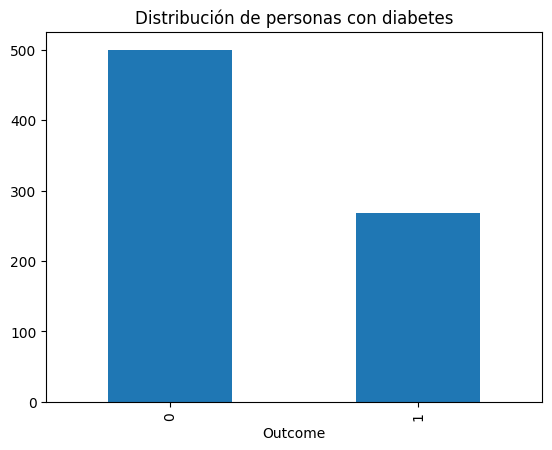

In [51]:
sino = df['Outcome'].value_counts()
sino.plot(kind='bar')
plt.title('Distribución de personas con diabetes')
plt.show()

### Variables cuantitativas: Age / DiabetesPedegreeFunction

In [52]:
variables_numericas = df.select_dtypes(include='number')
matriz_correlacion = variables_numericas.corr().round(2)
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Text(0.5, 1.0, 'Correlación entre características (Features)"')

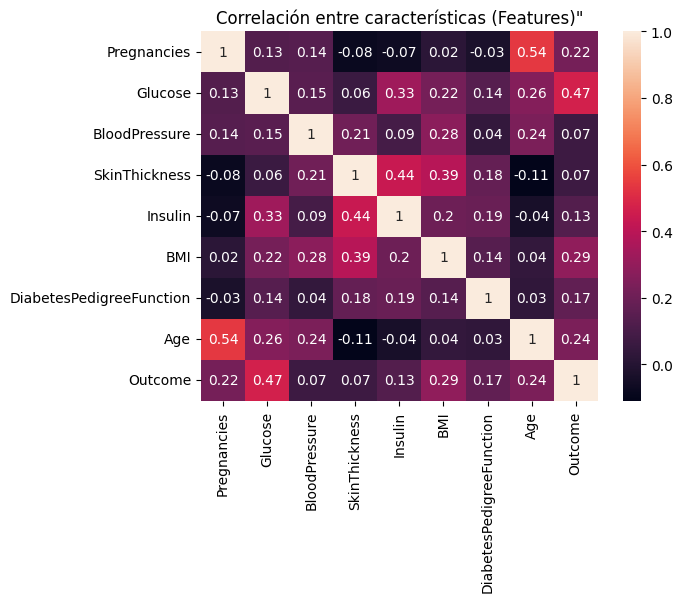

In [53]:
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Correlación entre características (Features)"')

### Age

In [54]:
print("Mediana:",df['Age'].median())
print("Media:",df['Age'].mean())
print(df['Age'].dtype)
df["Age"].isnull().sum()

df['Age']=df['Age'].fillna(df['Age'].median())

Mediana: 29.0
Media: 33.240885416666664
int64


Text(0.5, 1.0, 'Boxplot de Edad')

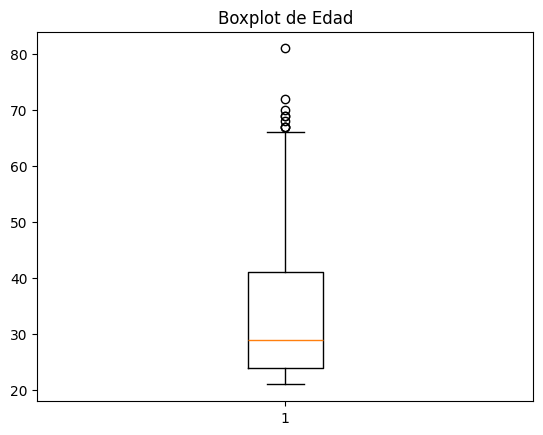

In [55]:
plt.boxplot(df['Age'])
plt.title('Boxplot de Edad')

En este boxplot podemos ubicar que la mayoría de los encuestrados tienen entre 25 y 40 años, con la mediana en 29 años. Esto indica que la mayoría de los participantes son adultos jovenes. Asimismo podemos identificar un amplio ramgo de edades, con datos "outliers" de hasta 80 años de edad. 

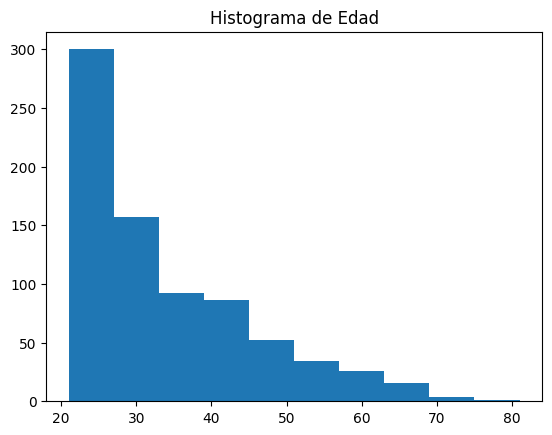

In [56]:
plt.hist(df['Age'], bins=10)
plt.title('Histograma de Edad')
plt.show()

En el histograma se pueden ver los datos cargados hacia la derecha, lo que indica que la mayoría de los participantes con adultos jovenes. 

Text(0.5, 1.0, 'Edad de acuerdo a Outcome')

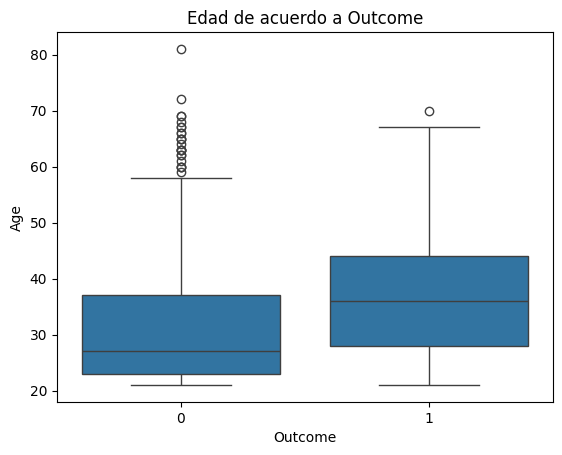

In [57]:
sns.boxplot(df, x="Outcome", y="Age")
plt.title("Edad de acuerdo a Outcome")

En esta tabla podemos ver la relación entre las variables de Outcome y Age, que nos dicen las edades de las personas que tienen diabetes y de las que no. 

Se puede ver que las personas que no tienen diabetes tienen edades muy exparcidas, lo que es natural ya que no es "a fuerzas" contraer diabetes. Sin embargo, se puede identificar que la mayoría de las personas que no tienen diabetes son adultos jóvenes, con una mediana debajo de los 30 años de edad. 

Tomando en cuenta a las personas con diabetes, se puede ver como las edades de la mayoría de las personas estan entre los 30 y 45 años, con una mediana en los 35 años. Esto indica que los adultos "no tan jovenes" son suceptibles a contraer diabetes a esa edad. También se puede identificar un mayor rango de edades que no son consideradas "outliers" lo que indica una mayor dispersión de datos confiables. 

### DiabetesPedegreeFunction

Mediana: 0.3725
Media: 0.47187630208333325
float64


Text(0.5, 1.0, 'Boxplot de DiabetesPedigreeFunction')

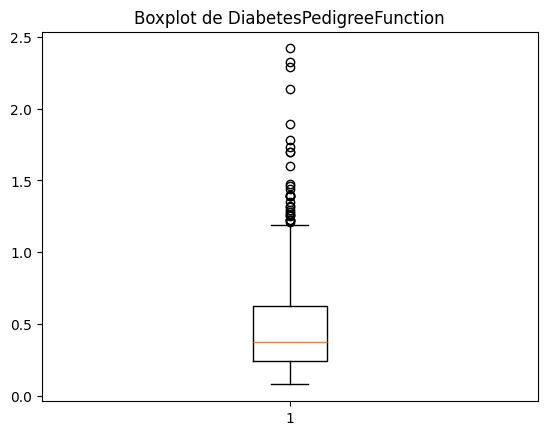

In [58]:
print("Mediana:",df['DiabetesPedigreeFunction'].median())
print("Media:",df['DiabetesPedigreeFunction'].mean())
print(df['DiabetesPedigreeFunction'].dtype)
df["DiabetesPedigreeFunction"].isnull().sum()

plt.boxplot(df['DiabetesPedigreeFunction'])
plt.title('Boxplot de DiabetesPedigreeFunction')

En este boxplot podemos ver qur la mayoria de los datos se encuentran entre 0.25 y 0.6 aproximadamente, con una mediana de 0.37. Sin embargo existen muchos datos dispersos en el diagrama, lo que se puede identificar en la diferencia de 0.1 entre la media y la mediana. 

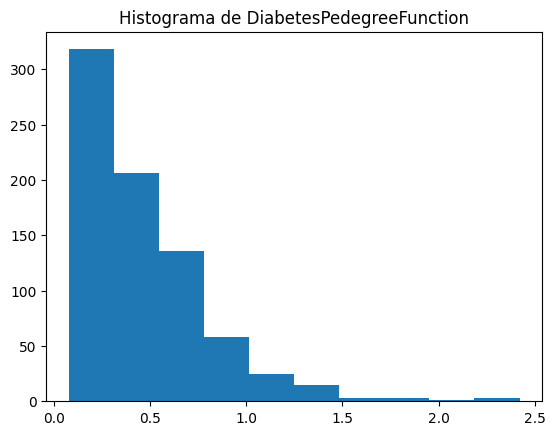

In [59]:
plt.hist(df['DiabetesPedigreeFunction'], bins=10)
plt.title('Histograma de DiabetesPedegreeFunction')
plt.show()

En este histograma se confirman las conclusiones del boxplot. La mayoría de los datos estan debajo del valor 0.5, sin embargo existen datos bastante polarizados, que afectan en el valor de la media. Por lo que la mediana es una mejor representacion de la población general. 

Text(0.5, 1.0, 'DiabetesPedigreeFunction de acuerdo a Outcome')

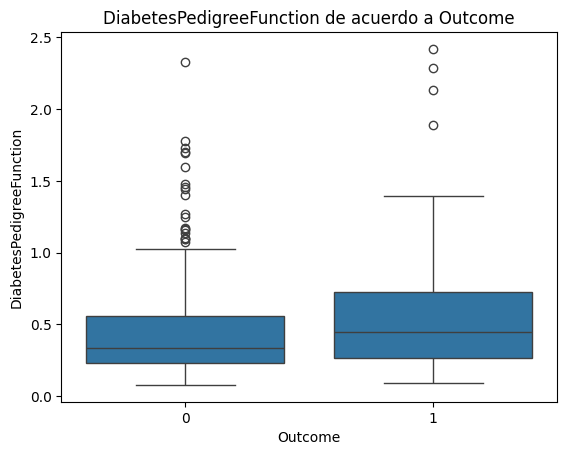

In [60]:
sns.boxplot(df, x="Outcome", y="DiabetesPedigreeFunction")
plt.title("DiabetesPedigreeFunction de acuerdo a Outcome")

Existe un solapamiento entre los grupos, la mayoria de los datos de ambos outcomes se encuentran en rangos parecidos, aunque la mediana de las personas con diabetes es mayor a la de personas que no tienen diabetes. Esto significa que mientras más grande sea el valor de DiabetesPedigreeFunction, mayor será la probabilidad de que esa persona tenga diabetes. 